<a href="https://colab.research.google.com/github/yerinsally/BDAA/blob/main/%EC%A0%95%EC%98%88%EB%A6%B0_0115_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 필수과제 
- fdr 데이터로 내가 원하는 기업을 분석
- 시각화 & 기본적인 전처리 필수
- 반복문을 통해서 최소 5개 이상 시각화 (컬럼은 최소 4개 이상)
- 단순히 하나의 기업이 아닌, 경쟁사(선도기업 등), 전체 시장에 대한 경쟁사 등 다양한 것을 고려해서 비교가능성이 보일 수 있도록 분석
- 재무제표만 가지고 해당 재무성과를 판단하기는 어려울 수 있음 : 비재무데이터, 신문, 뉴스 등 해당 분석 과정에서 이상한 점을 발견한다면, 비재무적 데이터도 서칭해서 함께 제시
- 주가 불러오는 방법 : Symbol 값과 원하는 기준연도를 적으면 가장 최근 연도까지 데이터를 불러옴

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# 한국거래소 상장종목 전체 불러오기
import FinanceDataReader as fdr
df_krx = fdr.StockListing('KRX') 
df_krx.Market.value_counts()

KOSDAQ           1566
KOSPI             943
KONEX             134
KOSDAQ GLOBAL      51
Name: Market, dtype: int64

In [4]:
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,64600,1,700,1.10,64400,65000,63900,18760182,1212764792491,385647952730000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,506000,2,-11000,-2.13,525000,526000,504000,459245,235054829000,118404000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,91500,2,-800,-0.87,91300,92800,90300,2553811,234318676392,66612216397500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,809000,1,14000,1.76,794000,811000,791000,83364,67041865000,57579766000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,685000,3,0,0.00,696000,696000,674000,186406,127932320000,48355754955000,70592343,STK


### 1. 반복문을 통한 시각화

In [5]:
stocks = {"삼성전자":"005930", "sk이노베이션":"096770", "현대모비스":"012330", "SK":"034730", "현대차":"005380"}

for i in stocks:
    print(i ,":",stocks[i])

삼성전자 : 005930
sk이노베이션 : 096770
현대모비스 : 012330
SK : 034730
현대차 : 005380


In [6]:
# 5개 기업의 주가 다운로드
for i in stocks:
    code = stocks[i]
    df = fdr.DataReader(code,'2021-01-01','2022-08-31')
    df.to_csv(f"{i}.csv")

In [7]:
# 이동평균 컬럼 추가
for i in stocks:
    code = stocks[i]
    df = fdr.DataReader(code,'2021-01-01','2022-08-31')   
    df.rename(columns={"Close":"종가","Volume":"거래량"},inplace = True)
    df.insert(5,'등락',df['종가'].diff())
    df['5일_이동평균']=df['종가'].rolling(5).mean().round(0)
    df['20일_이동평균']=df['종가'].rolling(20).mean().round(0)
    df['60일_이동평균']=df['종가'].rolling(60).mean().round(0)
    df['120일_이동평균']=df['종가'].rolling(120).mean().round(0)
    df = df[['종가','등락','거래량','5일_이동평균','20일_이동평균','60일_이동평균','120일_이동평균']]  
    df = df.dropna(how='any')
        
    df.to_csv(f"{i}_이동평균.csv")

In [8]:
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


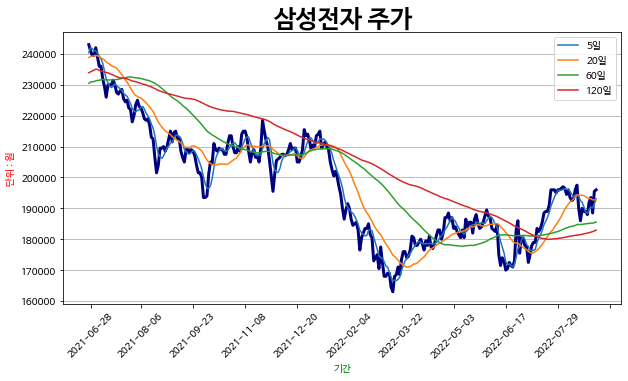

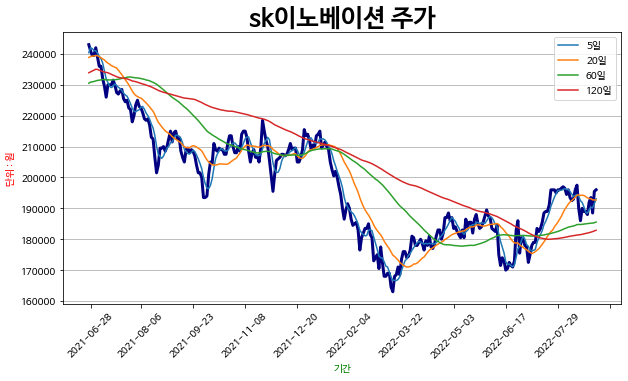

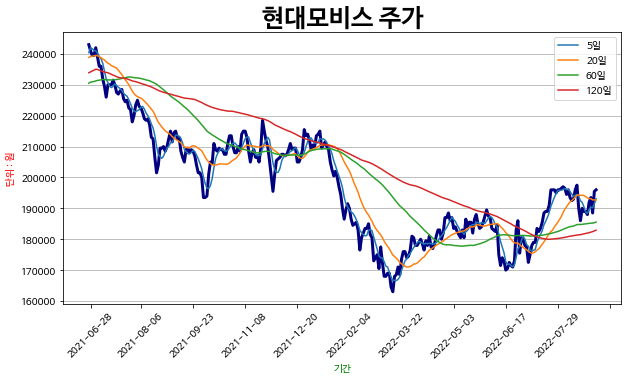

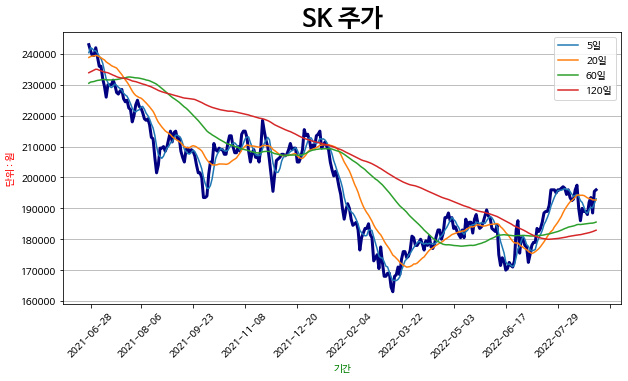

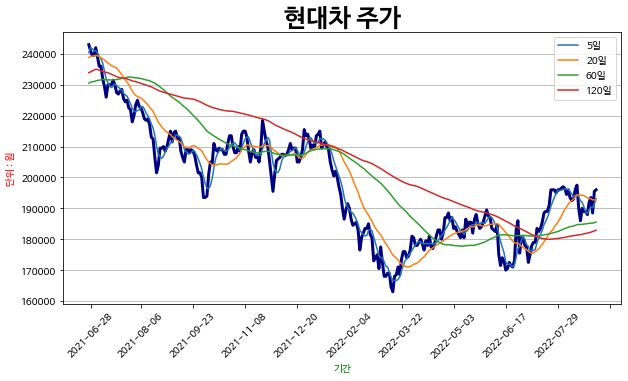

In [9]:
# 반복문을 통해 5개 기업의 주가 이동평균 시각화
for i in stocks:
    df.to_csv(f"{i}_이동평균.csv")     
    df = pd.read_csv(f"{i}_이동평균.csv")    
    plt.figure(figsize=(10,5))
    plt.plot(df["Date"],df["종가"], color="navy" , linewidth = 3)
    plt.plot(df["Date"],df["5일_이동평균"],label = "5일")
    plt.plot(df["Date"],df["20일_이동평균"],label = "20일")
    plt.plot(df["Date"],df["60일_이동평균"],label = "60일")
    plt.plot(df["Date"],df["120일_이동평균"],label = "120일")
    plt.title(f"{i} 주가", fontsize = 25, fontweight = "bold")
    plt.xticks([1,30,60,90,120,150,180,210,240,270,300],rotation = 45 )
    plt.xlabel("기간", color= "green")
    plt.ylabel("단위 : 원", color = "red")
    plt.legend(loc = "upper right")
    plt.grid(axis='y')
    plt.savefig(f"{i}.png")

### 셀트리온 (068270)
선정 이유 = 유일하게 가지고 있는 주식이라서,,

In [11]:
# Name = 셀트리온인 컬럼 찾기
df_krx.query('Name == "셀트리온"')

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
13,068270,KR7068270008,셀트리온,KOSPI,,166800,1,1500,0.91,165700,167500,164600,336316,55983157000,23486309028000,140805210,STK


In [12]:
# 2018년 ~ 현재까지의 셀트리온 주가를 데이터 프레임으로 불러오기
df_cell = fdr.DataReader('068270', '2018') # '해당 기업 symbol', '기준 연도'
df_cell.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,206047,209825,204757,208167,0,0.021709
2018-01-03,210930,227794,209272,227334,0,0.092075
2018-01-04,230007,240696,226044,230376,0,0.013381
2018-01-05,234890,246041,234061,245949,0,0.067598
2018-01-08,256637,279399,255440,278754,0,0.133381


In [13]:
# 가장 마지막(최신)의 10일치 주가 출력
df_cell.tail(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-01-12,167500,170000,167000,168000,308564,0.009009
2023-01-13,169000,172000,168500,169000,278561,0.005952
2023-01-16,170000,170000,168000,168000,154591,-0.005917
2023-01-17,168000,168500,163000,163500,330668,-0.026786
2023-01-18,163500,164500,162000,164000,211709,0.003058
2023-01-19,162500,166000,162000,164000,195569,0.000000
2023-01-20,163500,164000,161500,162500,242051,-0.009146
2023-01-25,163000,165300,163000,164500,200722,0.012308
2023-01-26,164100,165300,163300,165300,304929,0.004863


### 1. 간단한 전처리 및 시각화

In [20]:
# 종가 = close, 시가 = open, 고가 = high, 저가 = low, 거래량 = volume
df_cell.describe()

,Open,High,Low,Close,Volume,Change
count,1250.000000,1250.000000,1250.000000,1250.000000,1.250000e+03,1250.000000
mean,213816.988800,217948.374400,209667.629600,213300.010400,9.392079e+05,0.000291
std,52513.197058,53807.318138,50859.743443,52091.142218,1.020318e+06,0.030148
min,122374.000000,131242.000000,121931.000000,125479.000000,0.000000e+00,-0.135374
25%,168573.000000,171184.000000,165683.000000,168057.500000,4.361832e+05,-0.014485
50%,197288.500000,200721.000000,193341.000000,196462.000000,6.643240e+05,0.000000
75%,256673.750000,260940.000000,252153.000000,255595.750000,1.080756e+06,0.013991
max,368121.000000,374620.000000,354538.000000,374621.000000,1.199014e+07,0.237838


In [23]:
print(df_cell.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1250 entries, 2018-01-02 to 2023-01-27
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1250 non-null   int64  
 1   High    1250 non-null   int64  
 2   Low     1250 non-null   int64  
 3   Close   1250 non-null   int64  
 4   Volume  1250 non-null   int64  
 5   Change  1250 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 68.4 KB
None


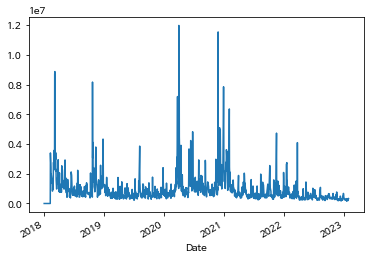

In [19]:
df_cell['Volume'].plot()

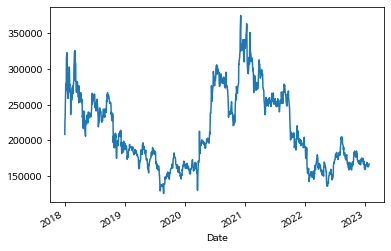

In [14]:
df_cell['Close'].plot()

### 2. 분석 목표
- 신한투자증권에서 셀트리온의 작년 3분기 실적에 대해 분석하고, 나머지 4분기와 2023년의 실적에 대한 전망을 예측한 레포트를 구글링을 통해 찾았다.
- 과연 이 전망이 바람직한지 주가를 시각화하여 분석해보고자 한다.

In [31]:
# 3분기:7~9월, 4분기:10~12월
df_cell_22 = fdr.DataReader('068270', '2022-07')
df_cell_22.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-07-01,173871,176279,167610,172427,547657,0.002803
2022-07-04,172426,174834,170500,172908,438591,0.002790
2022-07-05,173389,176279,170981,176280,470417,0.019502
2022-07-06,174834,183022,174834,179651,926342,0.019123
2022-07-07,181096,182059,177724,180614,383222,0.005360


In [32]:
# 2023 셀트리온 데이터
df_cell_23 = fdr.DataReader('068270', '2023')
df_cell_23.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-01-02,161000,164000,160000,160000,290850,-0.003115
2023-01-03,160000,162000,157500,159000,313306,-0.006250
2023-01-04,158500,161500,156000,160500,272316,0.009434
2023-01-05,161000,165000,160500,163000,290217,0.015576
2023-01-06,161500,165000,161500,163500,230828,0.003067


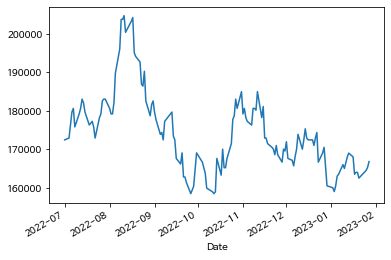

In [36]:
df_cell_22['Close'].plot()

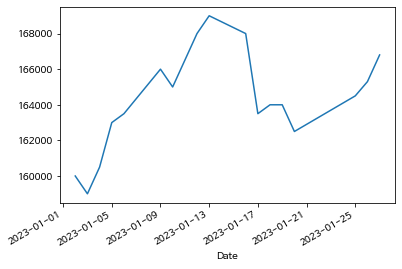

In [34]:
df_cell_23['Close'].plot()

In [49]:
# 셀트리온 2022-07 ~ 현재까지 주가 이동평균 시각화
new_data = fdr.DataReader('068270','2022')
new_data

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,191210,192655,189283,191210,433071,0.002522
2022-01-04,189283,192173,186875,187357,683677,-0.020151
2022-01-05,186394,186394,180132,180614,1155976,-0.035990
2022-01-06,176279,179169,172426,174353,1086295,-0.034665
2022-01-07,175316,179169,174834,175798,535083,0.008288
...,...,...,...,...,...,...
2023-01-19,162500,166000,162000,164000,195569,0.000000
2023-01-20,163500,164000,161500,162500,242051,-0.009146
2023-01-25,163000,165300,163000,164500,200722,0.012308


In [50]:
new_data.rename(columns={"Close":"종가","Volume":"거래량"},inplace = True)
new_data.insert(5,'등락',new_data['종가'].diff())
new_data['5일_이동평균']=new_data['종가'].rolling(5).mean().round(0)
new_data['20일_이동평균']=new_data['종가'].rolling(20).mean().round(0)
new_data['60일_이동평균']=new_data['종가'].rolling(60).mean().round(0)
new_data['120일_이동평균']=new_data['종가'].rolling(120).mean().round(0)
new_data = new_data[['종가','등락','거래량','5일_이동평균','20일_이동평균','60일_이동평균','120일_이동평균']]
new_data = new_data.dropna() # 결측치 제거
new_data

,종가,등락,거래량,5일_이동평균,20일_이동평균,60일_이동평균,120일_이동평균
Date,,,,,,,
2022-06-29,169537,1445.0,425999,165298.0,154871.0,154181.0,158435.0
2022-06-30,171945,2408.0,833689,168766.0,155738.0,154317.0,158274.0
2022-07-01,172427,482.0,547657,170211.0,156773.0,154437.0,158150.0
2022-07-04,172908,481.0,438591,170982.0,157640.0,154614.0,158086.0
2022-07-05,176280,3372.0,470417,172619.0,158796.0,154879.0,158102.0
...,...,...,...,...,...,...,...
2023-01-19,164000,0.0,195569,165700.0,165328.0,171136.0,173941.0
2023-01-20,162500,-1500.0,242051,164400.0,164735.0,170794.0,173770.0
2023-01-25,164500,2000.0,200722,163700.0,164628.0,170525.0,173615.0


In [51]:
new_data.to_csv("셀트리온_이동평균.csv")

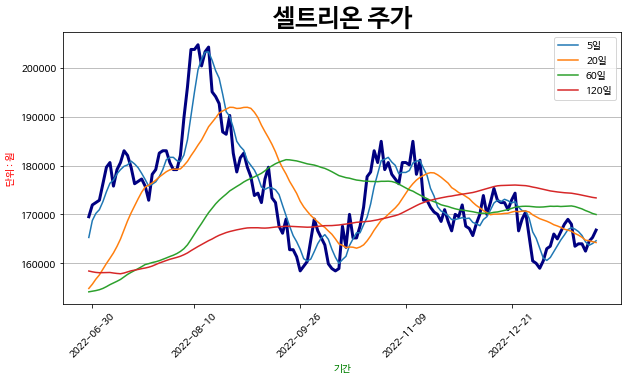

In [53]:
data = pd.read_csv("셀트리온_이동평균.csv")

plt.figure(figsize=(10,5))
plt.plot(data["Date"],data["종가"], color="navy" , linewidth = 3)
plt.plot(data["Date"],data["5일_이동평균"],label = "5일")
plt.plot(data["Date"],data["20일_이동평균"],label = "20일")
plt.plot(data["Date"],data["60일_이동평균"],label = "60일")
plt.plot(data["Date"],data["120일_이동평균"],label = "120일")
plt.title("셀트리온 주가", fontsize = 25, fontweight = "bold")
plt.xticks([1,30,60,90,120],rotation = 45 )
plt.xlabel("기간", color= "green")
plt.ylabel("단위 : 원", color = "red")
plt.legend(loc = "upper right")
plt.grid(axis='y')

결론
- 4분기에 특별한 주가상승은 없었지만 역시 주가하락도 크지 않음. 2023 데이터는 아직 부족하여 2분기에 더 분석해보면 될 것 같음.